# Pandas and Seaborn based homework

DSE5002
HD Sheets, revised Feb 2025

We will be working with the heart.csv data set

https://www.kaggle.com/fedesoriano/heart-failure-prediction?select=heart.csv
    
using tools in pandas and seaborn,  and ideas from the two Jupyter notebooks we've seen this week



In [70]:
!pip install pandas numpy seaborn plotnine

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotnine as p9

In [72]:
# make sure heart.csv is in your current working directory, or list the full path name in the variable infile

infile=r".\data\heart.csv"

bp_df=pd.read_csv(infile)
bp_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Find or create the following

a.) -Find the dimensions,   memory used, and other basic information

b.) -Run the data summary

c.) Change the appropriate variables to type Categorical

d.) -Create a pivot table (using the Pandas groupby operation) showing mean Resting BP by Sex, Resting ECG and HeartDisease-What does this tell you? What else can you figure out using a Pivot table, show me two other helpful pivot tables based on different variables, different groupings or different aggregation functions (count, mean, max etc)

e.) -Show a histogram and the ECDF  (empirical cumulative distribution function) for several continuous variables in the data set,   in broad 
    terms, what do the distributions look like,  normal? exponential, poison-like?, uniform?   Does this match your expectations?

    https://seaborn.pydata.org/generated/seaborn.ecdfplot.html
    https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ecdf.html
    

f.) -Show An SNS Pairplot,   the most informative version you can find,   set the hue based on Heart Disease,  try using at least one
other variable as the Hue.  Discuss what you think you are seeing in this plot

g.) Create several useful or informative boxplots of continuous variables by category, using Seaborn or PlotNine. Find an interesting result or contrast among the variables, discuss what you think it means or implies

h.) Create violin plots of these same results

i.) Find the mean, median and standard deviation of the Max heartrate variable in this data set

Turn this into a pivot table,   grouping by one or more predictors.   

Create all these results in this Notebook and turn it in

# Source

[Pandas Docs](https://pandas.pydata.org/docs/reference/frame.html)

# Part A 

a.) -Find the dimensions,   memory used, and other basic information

In [73]:
bp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Part B

b.) -Run the data summary

In [74]:
bp_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Part C

c.) Change the appropriate variables to type Categorical

## Starting with the long approach here, I think this can be improved, though.

In [75]:
# Get unique values from the categorical columns
chest_pain_cats, sex_cats, resting_ecg_cats, exercise_angina_cats, st_slope_cats, heart_disease_cats, fasting_bs_cats = pd.unique(bp_df["ChestPainType"]), pd.unique(bp_df["Sex"]), pd.unique(bp_df["RestingECG"]), pd.unique(bp_df["ExerciseAngina"]), pd.unique(bp_df["ST_Slope"]), pd.unique(bp_df["HeartDisease"]), pd.unique(bp_df["FastingBS"])

#Set the chest pain type column to categorical with the categories defined by the unique function
bp_df["ChestPainType"] = pd.Categorical(bp_df["ChestPainType"], categories=chest_pain_cats)
bp_df["Sex"] = pd.Categorical(bp_df["Sex"], categories=sex_cats)
bp_df["RestingECG"] =  pd.Categorical(bp_df["RestingECG"], categories=resting_ecg_cats)
bp_df["ExerciseAngina"] = pd.Categorical(bp_df["ExerciseAngina"], categories=exercise_angina_cats)
bp_df["ST_Slope"] = pd.Categorical(bp_df["ST_Slope"], categories=st_slope_cats)
bp_df["HeartDisease"] = pd.Categorical(bp_df["HeartDisease"], categories=heart_disease_cats)
bp_df["FastingBS"] = pd.Categorical(bp_df["FastingBS"], categories=fasting_bs_cats)

#Verify
bp_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 43.2 KB


## Now, let's make this a bit more functional...

In [76]:
# Read in the original df
bp_df_original=pd.read_csv(infile)

# Convert HeartDisease and FastingBS to objects, as these are the exceptions for the original dtypes of the categorical variables
bp_df_original["HeartDisease"] = bp_df_original["HeartDisease"].astype("object")
bp_df_original["FastingBS"] = bp_df_original["FastingBS"].astype("object")

# All columns with the dtype "object" will become our categorical columns. Loop through the columns, and if the dtype is object, convert it to categorical
for col in bp_df_original.columns:
    if bp_df_original[f"{col}"].dtype == "object":
        categories = pd.unique(bp_df_original[f"{col}"])
        bp_df_original[f"{col}"] = pd.Categorical(bp_df_original[f"{col}"], categories=categories)

#Verify
bp_df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             918 non-null    int64   
 1   Sex             918 non-null    category
 2   ChestPainType   918 non-null    category
 3   RestingBP       918 non-null    int64   
 4   Cholesterol     918 non-null    int64   
 5   FastingBS       918 non-null    category
 6   RestingECG      918 non-null    category
 7   MaxHR           918 non-null    int64   
 8   ExerciseAngina  918 non-null    category
 9   Oldpeak         918 non-null    float64 
 10  ST_Slope        918 non-null    category
 11  HeartDisease    918 non-null    category
dtypes: category(7), float64(1), int64(4)
memory usage: 43.2 KB


## Great, now this is flexible and can be applied to arbitrarily large data sets. Much better than manually doing each type change.

# Part D

d.) -Create a pivot table (using the Pandas groupby operation) showing mean Resting BP by Sex, Resting ECG and HeartDisease-What does this tell you? What else can you figure out using a Pivot table, show me two other helpful pivot tables based on different variables, different groupings or different aggregation functions (count, mean, max etc)

In [77]:
bp_df[["RestingBP", "Sex"]].groupby(["Sex"]).mean()

C:\Users\water\AppData\Local\Temp\ipykernel_22168\233112352.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,RestingBP
Sex,
M,132.445517
F,132.212435


In [78]:
bp_df[["RestingBP", "RestingECG"]].groupby(["RestingECG"]).mean()

C:\Users\water\AppData\Local\Temp\ipykernel_22168\2621982121.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,RestingBP
RestingECG,
Normal,130.635870
ST,135.808989
LVH,134.335106


In [79]:
bp_df[["RestingBP", "HeartDisease"]].groupby(["HeartDisease"]).mean()

C:\Users\water\AppData\Local\Temp\ipykernel_22168\2443954490.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,RestingBP
HeartDisease,
0,130.180488
1,134.185039


## These pivot tables help highlight the respective relationship between sex, resting ECG, heart disease, and mean resting blood pressure.

## Now, lets take a look at how MaxHR is related to heart disease

In [80]:
bp_df[["MaxHR", "HeartDisease"]].groupby(["HeartDisease"]).mean()

C:\Users\water\AppData\Local\Temp\ipykernel_22168\1575525349.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,MaxHR
HeartDisease,
0,148.151220
1,127.655512


## Okay, this is what I would expect. Heart disease has a significant impact on max heartrate, which is a good indicator of overall cardiovascular fitness. There is, however, a confounding variable here, which is age. Let's see the average ages of people with and without heart disease...

In [81]:
bp_df[["Age", "HeartDisease"]].groupby(["HeartDisease"]).mean()

C:\Users\water\AppData\Local\Temp\ipykernel_22168\1810670197.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,Age
HeartDisease,
0,50.551220
1,55.899606


## Ahhh, okay. Since max heart rate is a function of age, as is the propensity for heart disease, I hypothesized that the heart disease group might be older on average. This hypothesis ended up being correct, as the heart disease group is about 5 years older on average than the non-heart disease group. Without any further analysis, it is implied that both age and heart disease affect max heart rate.

# Part E

e.) -Show a histogram and the ECDF  (empirical cumulative distribution function) for several continuous variables in the data set,   in broad terms, what do the distributions look like, normal? exponential, poison-like?, uniform? Does this match your expectations?

[ECDF Source - Seaborn](https://seaborn.pydata.org/generated/seaborn.ecdfplot.html)

[ECDF Source - Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ecdf.html)

## Let's do this with both seaborn and matplotlib to see how they differ. First, seaborn... Plot the hist and ecdf for age, maxhr, cholestrol, and restingbp. I am going to cheat a bit and use the matplotlib subplot feature to pack everything into one plot and make this more compact.

In [82]:
import matplotlib.pyplot as plt

<Axes: xlabel='RestingBP', ylabel='Count'>

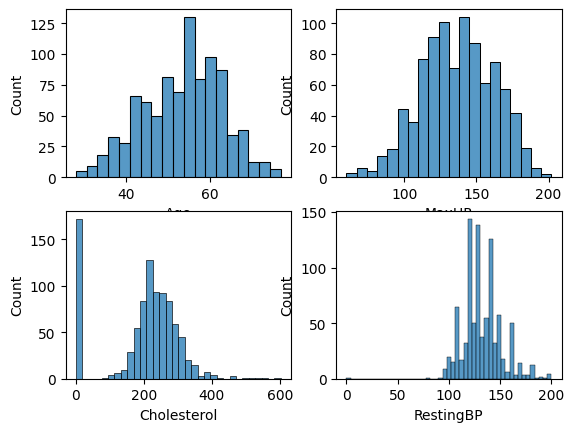

In [83]:
fig, axs = plt.subplots(nrows=2,ncols=2)
sns.histplot(bp_df["Age"], ax=axs[0,0])
sns.histplot(bp_df["MaxHR"], ax=axs[0,1])
sns.histplot(bp_df["Cholesterol"], ax=axs[1,0])
sns.histplot(bp_df["RestingBP"], ax=axs[1,1])

<Axes: xlabel='RestingBP', ylabel='Proportion'>

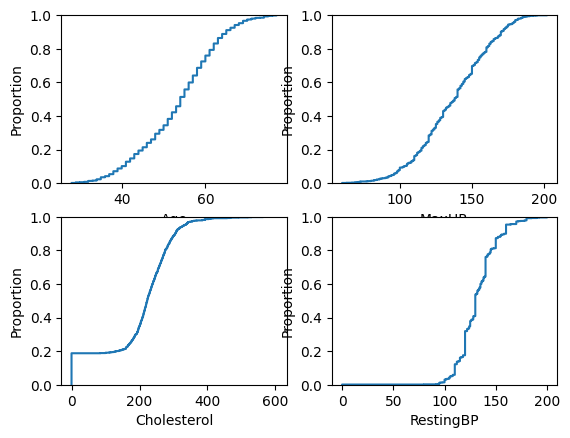

In [84]:
fig, axs = plt.subplots(nrows=2,ncols=2)
sns.ecdfplot(bp_df["Age"], ax=axs[0,0])
sns.ecdfplot(bp_df["MaxHR"], ax=axs[0,1])
sns.ecdfplot(bp_df["Cholesterol"], ax=axs[1,0])
sns.ecdfplot(bp_df["RestingBP"], ax=axs[1,1])

## That was relatively painless. Now, let's try matplotlib.

(array([  1.,   0.,   0.,   0.,  12., 148., 430., 234.,  73.,  20.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

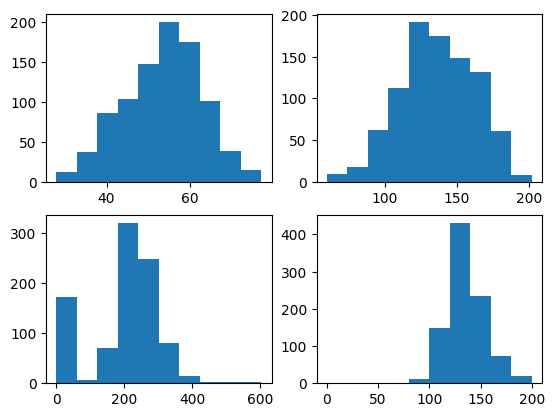

In [85]:
fig, axs = plt.subplots(nrows=2,ncols=2)
axs[0,0].hist(bp_df["Age"])
axs[0,1].hist(bp_df["MaxHR"])
axs[1,0].hist(bp_df["Cholesterol"])
axs[1,1].hist(bp_df["RestingBP"])

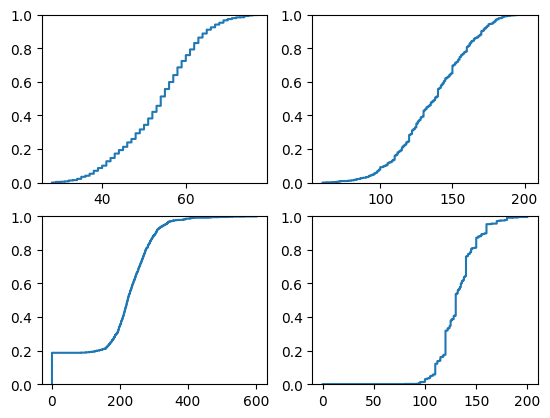

In [86]:
fig, axs = plt.subplots(nrows=2,ncols=2)
axs[0,0].ecdf(bp_df["Age"])
axs[0,1].ecdf(bp_df["MaxHR"])
axs[1,0].ecdf(bp_df["Cholesterol"])
axs[1,1].ecdf(bp_df["RestingBP"])

## Slightly different, but I would say comparable effort. In the future, it seems like matplotlib will be better for this kind of analysis because of the multiplotting feature. That was not something I could find in seaborn for unrelated plots.

## Time to discuss the plots... they are strongly normally distributed, aside from outliers in the cholesterol and resting blood pressure charts. Cholesterol has a large count of 0, which I assume are people who did not have their cholesterol measured, otherwise they would be dead. I assume the same is true for the set of blood pressure measurements that were 0, but that seems to only be one person.

# Part F

f.) -Show An SNS Pairplot,   the most informative version you can find,   set the hue based on Heart Disease,  try using at least one
other variable as the Hue.  Discuss what you think you are seeing in this plot

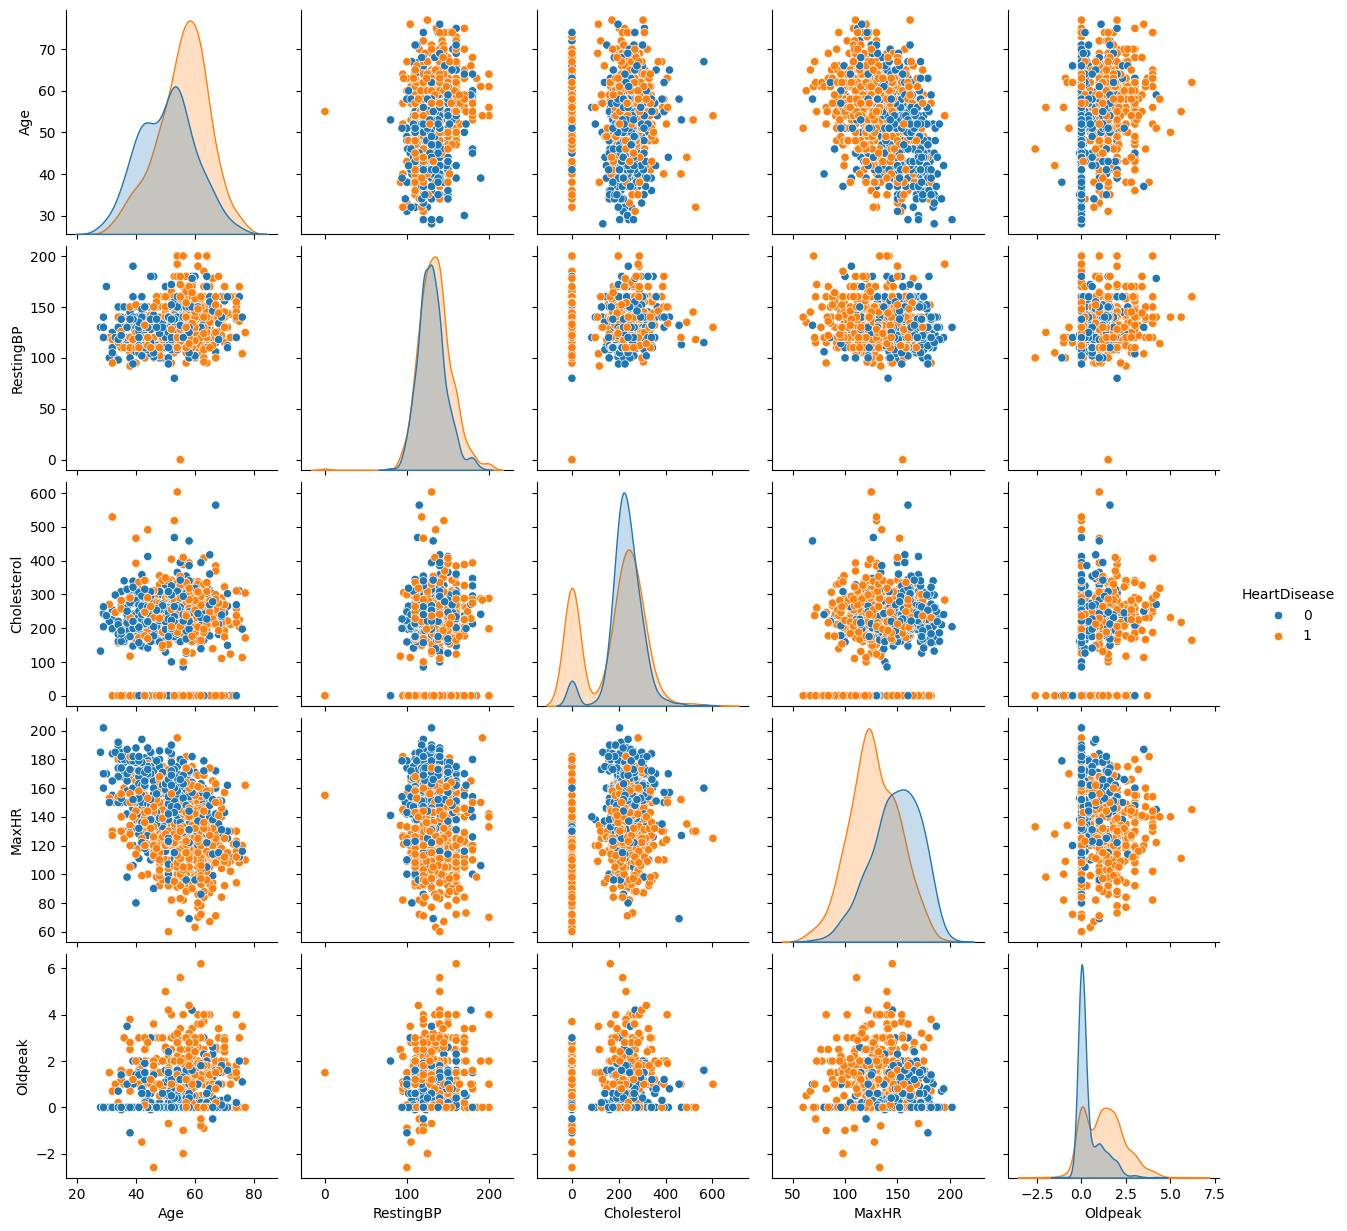

In [87]:
sns.pairplot(bp_df, hue="HeartDisease")

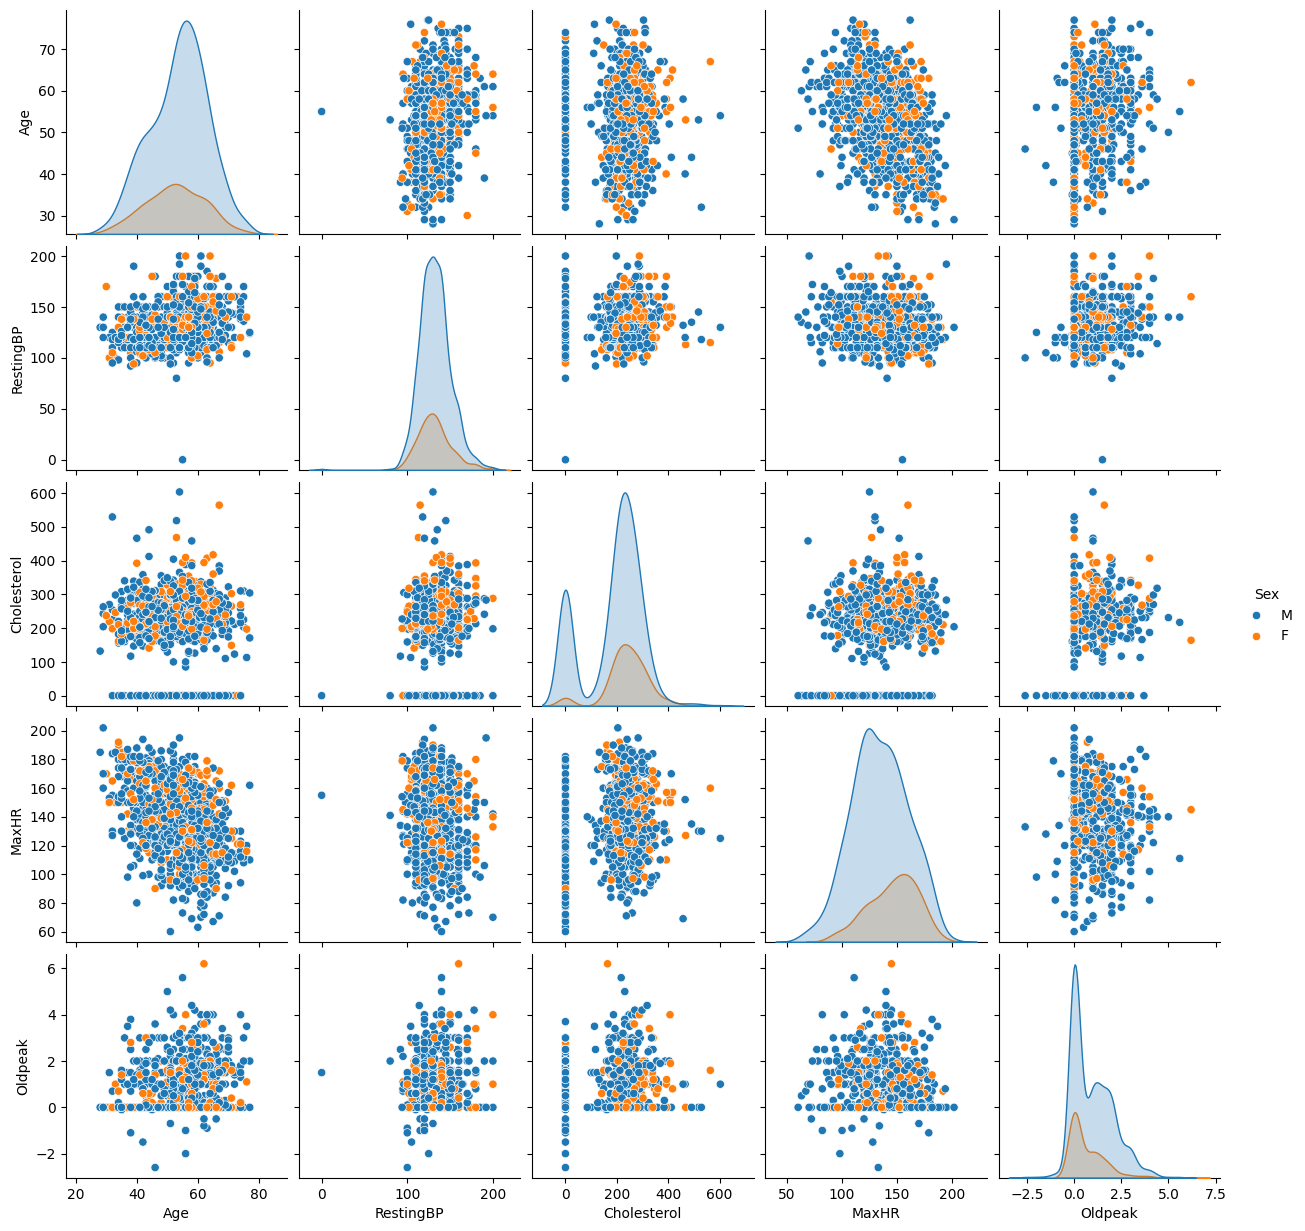

In [88]:
sns.pairplot(bp_df, hue="Sex")

## The pairplot chart seems to compare all continuous variables against each other, with the hue as the categorical measure. The grid spaces where the variables are compared to themselves feature a distribution plot. This is very similar to the pairplot in R, but unlike R, the correlation between the variables is not explicitly defined.

# Part G

g.) Create several useful or informative boxplots of continuous variables by category, using Seaborn or PlotNine. Find an interesting result or contrast among the variables, discuss what you think it means or implies

## Using plotnine here to see how it works...

[PlotNine Reference](https://plotnine.org/reference/geom_boxplot.html)

## Immediately, I get the sense that this is a python implementation of the ggplot R library. The syntax is identical.



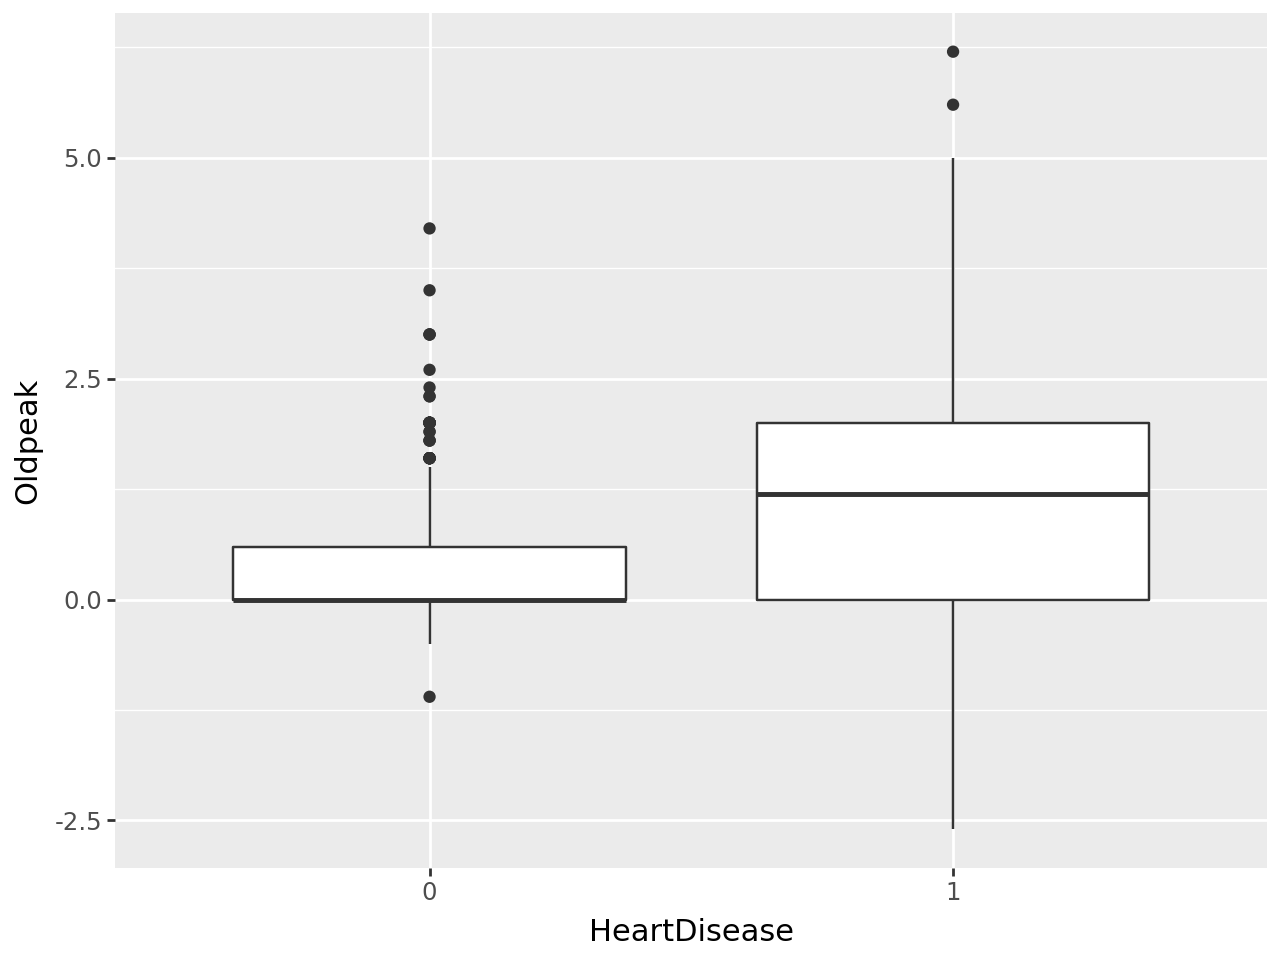

In [93]:
ggplot = p9.ggplot
geom_boxplot = p9.geom_boxplot
aes=p9.aes

(
    ggplot(bp_df)
    + geom_boxplot(aes(x="HeartDisease", y="Oldpeak"))
)

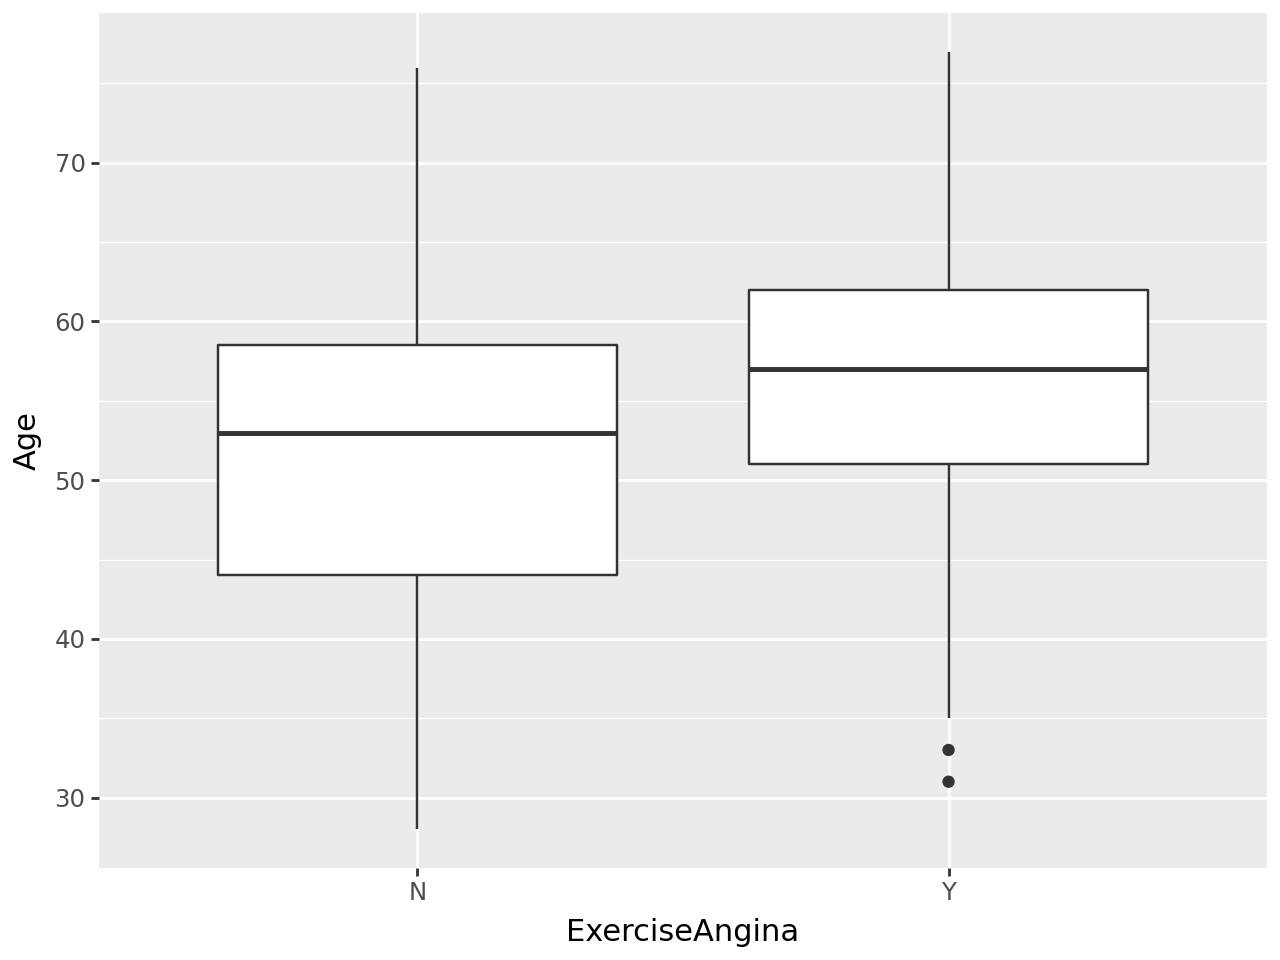

In [94]:
(
    ggplot(bp_df)
    + geom_boxplot(aes(x="ExerciseAngina", y="Age"))
)

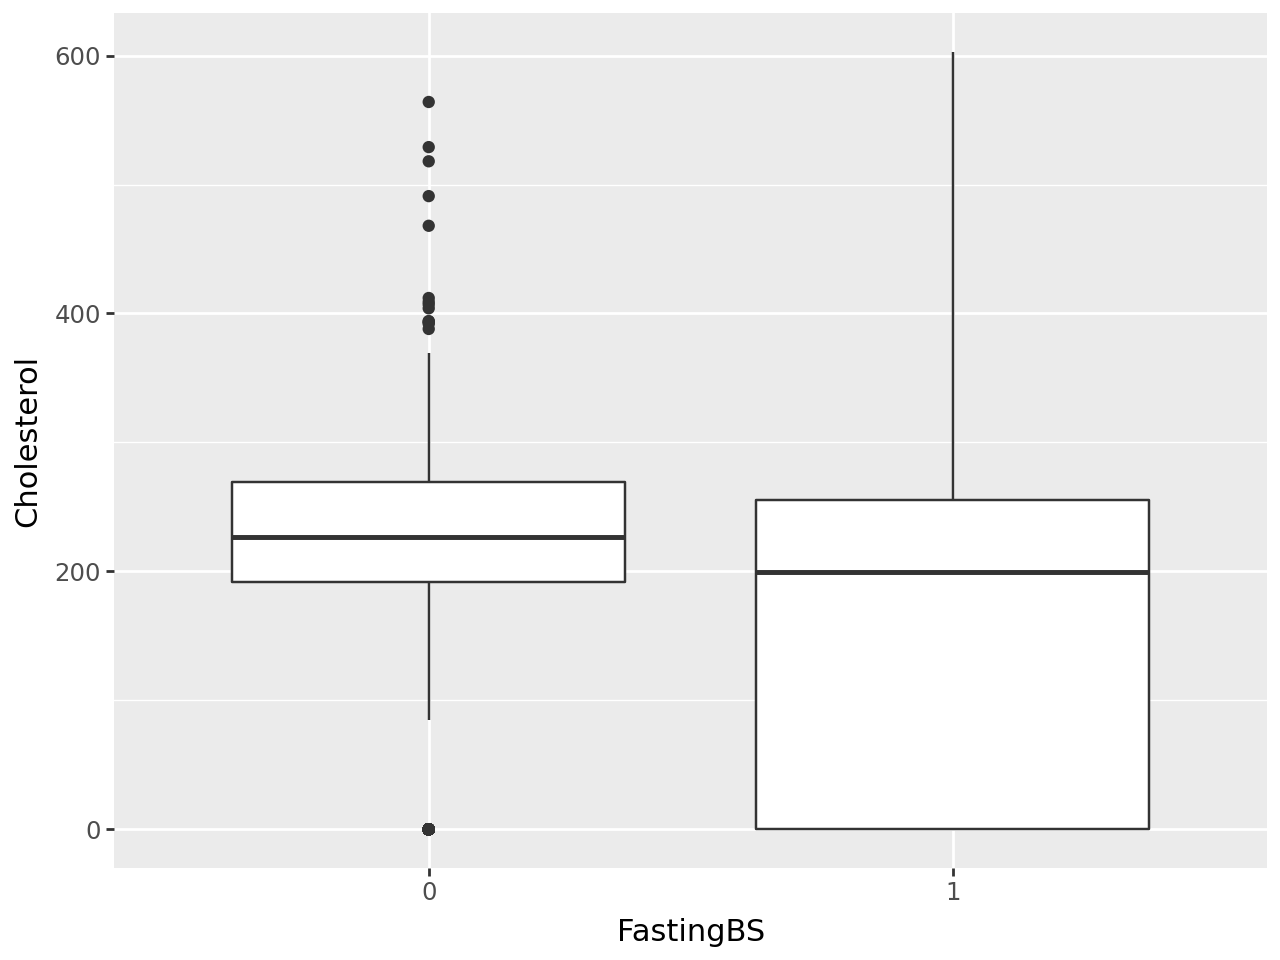

In [95]:
(
    ggplot(bp_df)
    + geom_boxplot(aes(x="FastingBS", y="Cholesterol"))
)

## Based on how these graphs look, it seems like plotnine literally ports R's rendering engine into python. Pretty neat. I already have R on my machine, but I would be interested in knowing if this package requires R to be installed, or if it installs the rendering engine as part of the package.

# Part H

h.) Create violin plots of these same results

## This is pretty easy to do in R with ggplot, but this would be a good time to compare and contrast libraries.

## Plotnine implementation:

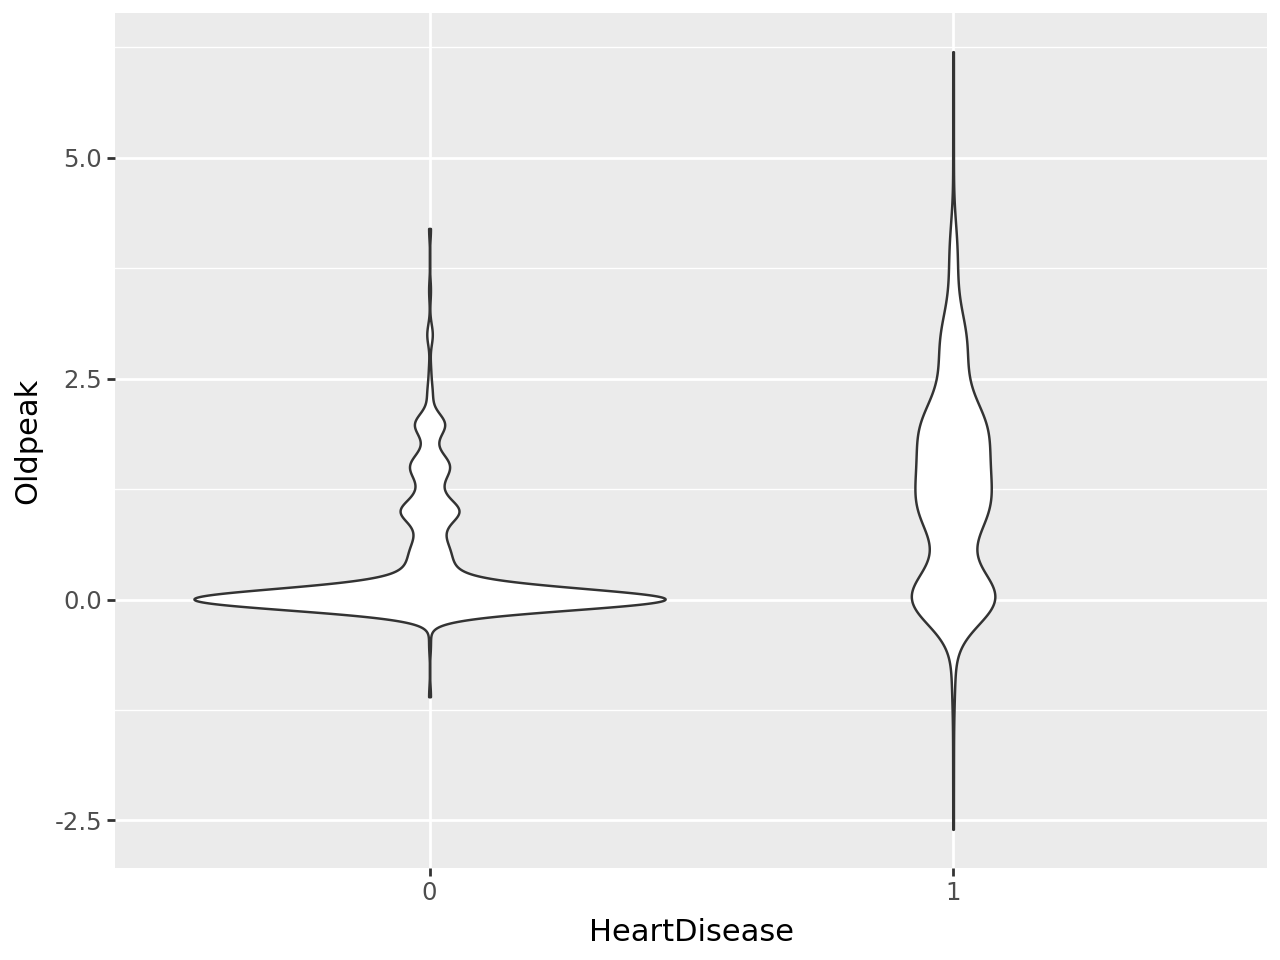

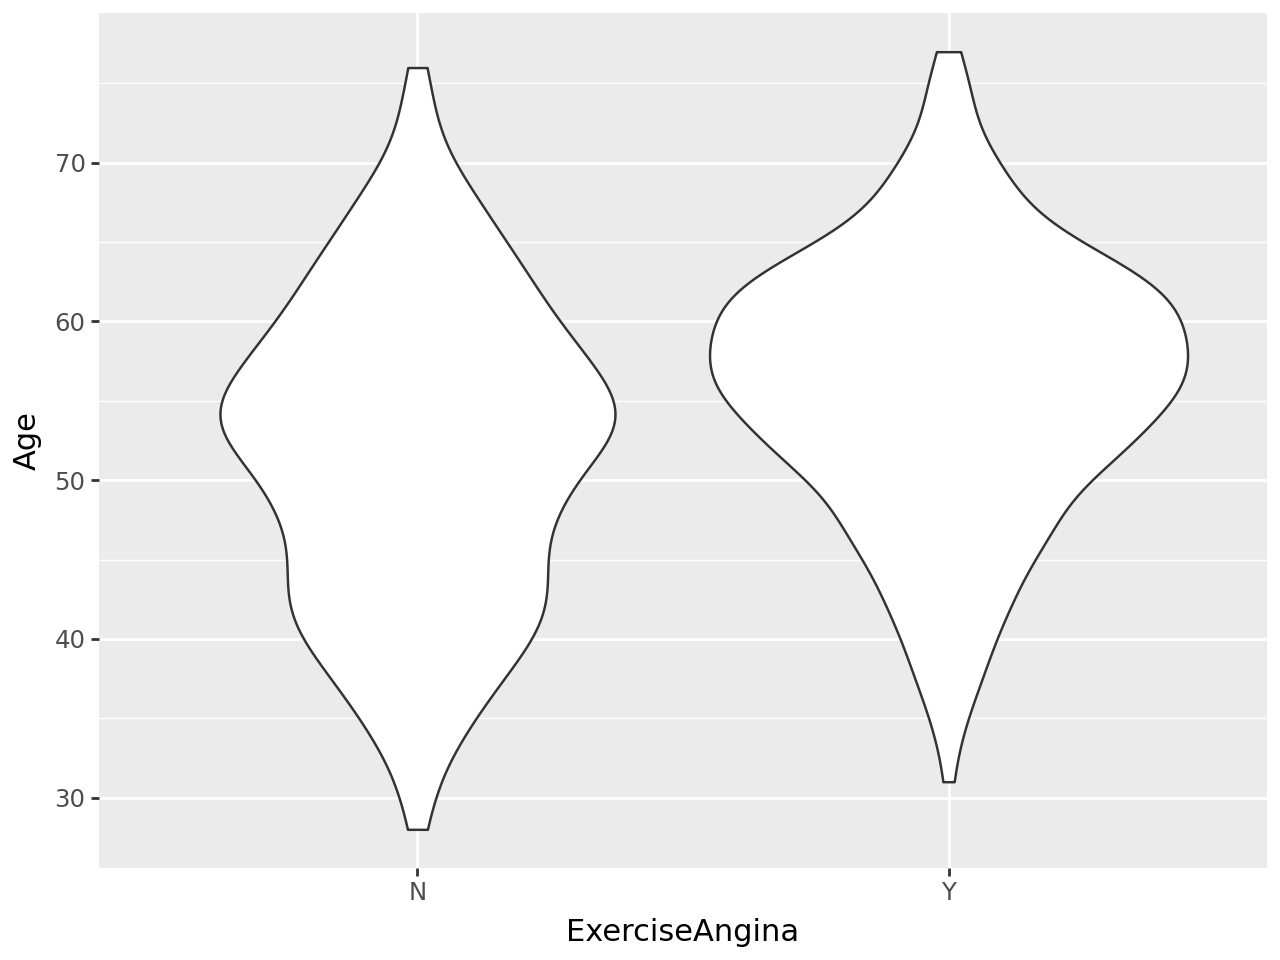

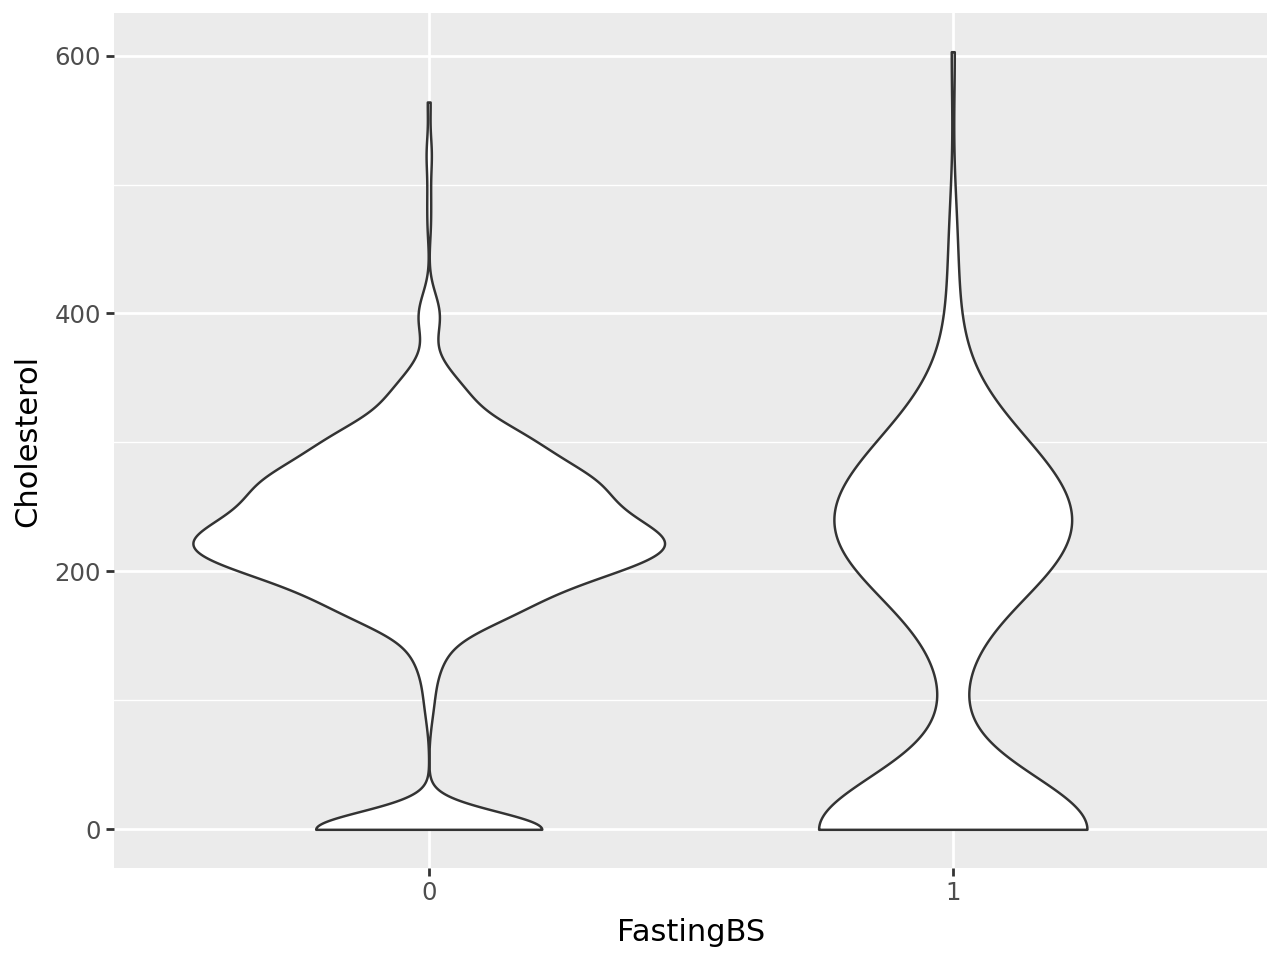

In [114]:
geom_violin = p9.geom_violin

plt1 = (
    ggplot(bp_df)
    + geom_violin(aes(x="HeartDisease", y="Oldpeak"))
)

plt2 = (
    ggplot(bp_df)
    + geom_violin(aes(x="ExerciseAngina", y="Age"))
)

plt3 = (
    ggplot(bp_df)
    + geom_violin(aes(x="FastingBS", y="Cholesterol"))
)

for i, plot in enumerate([plt1,plt2,plt3]):
    plot.show()

## Seaborn Implementation:

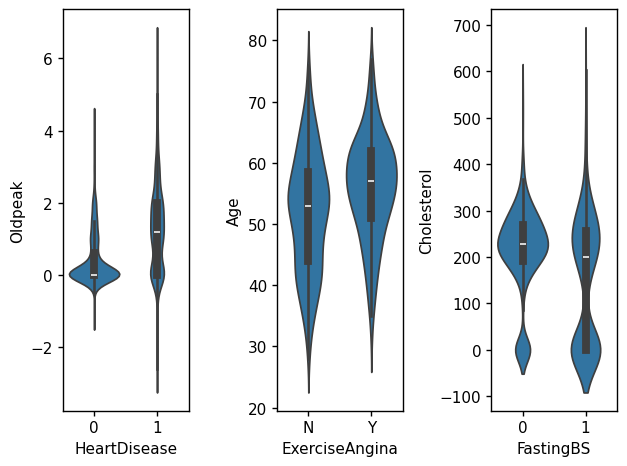

In [ ]:
fig, axs = plt.subplots(ncols=3)

sns.violinplot(data=bp_df, x="HeartDisease", y="Oldpeak", ax=axs[0])
sns.violinplot(data=bp_df, x="ExerciseAngina", y="Age", ax=axs[1])
sns.violinplot(data=bp_df, x="FastingBS", y="Cholesterol", ax=axs[2])

plt.tight_layout()

## Matplotlib Implementation:

C:\Users\water\AppData\Local\Temp\ipykernel_22168\3703374422.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
C:\Users\water\AppData\Local\Temp\ipykernel_22168\3703374422.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.


{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x1d01296b440>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x1d012954bc0>,
 'cmins': <matplotlib.collections.LineCollection at 0x1d012f86e70>,
 'cbars': <matplotlib.collections.LineCollection at 0x1d0129031d0>}

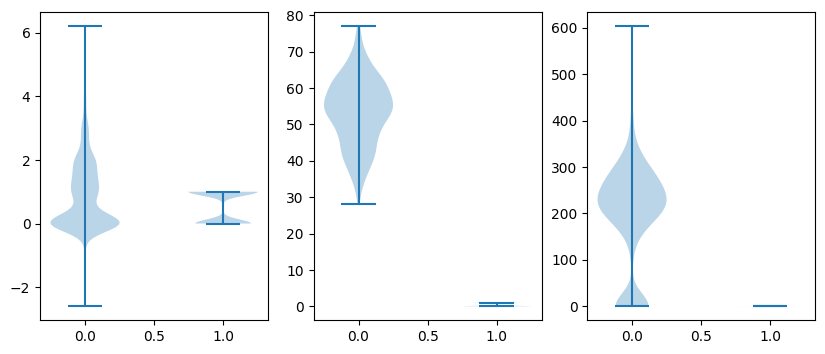

In [148]:
fig, axs = plt.subplots(ncols=3, figsize=(10, 4))

# After messing around with this for a while, it became clear that matplotlibs violin plot gets a little upset when the 
# categorical variable is not an integer. Let's convert ExerciseAngina to an int.
converted = bp_df["ExerciseAngina"].replace(["Y","N"], [1,0])

axs[0].violinplot(bp_df[["Oldpeak", "HeartDisease"]], positions=[0,1])
axs[1].violinplot([bp_df["Age"], converted], positions=[0,1])
axs[2].violinplot(bp_df[["Cholesterol","FastingBS"]], positions=[0,1])


## I could be doing something wrong here, but it doesn't seem like matplotlib is equipped to properly handle categorical data in violin plots. Good thing there are two other libraries that do this just fine :).

# Part I


i.) Find the mean, median and standard deviation of the Max heartrate variable in this data set. Turn this into a pivot table, grouping by one or more predictors.   

In [149]:
# First find these metrics on the MaxHR data alone.
mean = bp_df["MaxHR"].mean()
median = bp_df["MaxHR"].median()
std = bp_df["MaxHR"].std()

print(f"Mean: {mean}\t\tMedian: {median}\t\tStandard Deviation: {std}")


Mean: 136.80936819172112		Median: 138.0		Standard Deviation: 25.4603341382503


In [ ]:
# Now, pivot tables
bp_df[["MaxHR", "Age"]].groupby("Age").mean()

,MaxHR
Age,
28,185.0
29,170.0
30,170.0
31,151.5
32,155.0
33,167.5
34,174.0
35,156.0
36,175.0


In [153]:
bp_df[["MaxHR", "Age"]].groupby("Age").median()

,MaxHR
Age,
28,185.0
29,170.0
30,170.0
31,151.5
32,155.0
33,167.5
34,174.0
35,156.0
36,175.0


In [154]:
bp_df[["MaxHR", "Age"]].groupby("Age").std()

,MaxHR
Age,
28,NaN
29,21.939310
30,NaN
31,2.121320
32,24.035391
33,24.748737
34,16.399768
35,20.300022
36,21.979536


## Just for fun, let's group by multiple predictors. There are several ages, so this will have to be written to a csv to actually analyze.

In [160]:
mean_data = bp_df[["MaxHR", "Age", "HeartDisease"]].groupby(["Age","HeartDisease"]).mean()
mean_data.to_csv(r"Data\Mean_data.csv")

C:\Users\water\AppData\Local\Temp\ipykernel_22168\736809882.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [161]:
median_data = bp_df[["MaxHR", "Age", "HeartDisease"]].groupby(["Age","HeartDisease"]).median()
median_data.to_csv(r"Data\Median_data.csv")

C:\Users\water\AppData\Local\Temp\ipykernel_22168\4175941233.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


In [162]:
std_data = bp_df[["MaxHR", "Age", "HeartDisease"]].groupby(["Age","HeartDisease"]).std()
std_data.to_csv(r"Data\std_data.csv")

C:\Users\water\AppData\Local\Temp\ipykernel_22168\2868568099.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


## Here are the other deliverables for this week, just so this doesn't slip through the cracks:

### Cloned GitHub Repo

![Cloned GitHub Repo](additional_deliverables\cloned_repo.png)

### GitHub Repos on GitHub Website

![GitHub Repos on GitHub Website](additional_deliverables\github_repos.png)

### DSE5002 Repo on GitHub

![DSE5002 Repo on GitHub](additional_deliverables\github.png)

### Postgres Databases

![Postgres](additional_deliverables\postgres.png)
